## Convolutional Neural Network



In this notebook you will learn to distinguish dogs from cats!

Data:
https://drive.google.com/drive/folders/1bkcr55sW6BrcgKVPEGTb3vvhpnrklKKq?usp=sharing

Fill in cells below and fit neural networks for solving the binary classification task.

**Requirement**
- Python, Pytorch (Must), and all other necessary libraries
- **Just don't cheat, Thanks!**
- Sample output is to help you understand the task, and get an idea of what you have to do
- Dur date is Nov 10, 11:59pm. You ONLY need to submit this notebook. Include instructions to run your code.

## Task 1(25 points):

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

First, let's load all the necessary functions:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Research on how to load google drive files into colab if you are using colab

In [ ]:
!cp '/content/drive/MyDrive/Colab Notebooks/test-20230725T062948Z-001.zip' ./
!cp '/content/drive/MyDrive/Colab Notebooks/train-20230725T062949Z-001.zip' ./
!cp '/content/drive/MyDrive/Colab Notebooks/val-20230725T062951Z-001.zip' ./

In [ ]:
!unzip /content/test-20230725T062948Z-001.zip

In [ ]:
!unzip /content/train-20230725T062949Z-001.zip


In [ ]:
!unzip /content/val-20230725T062951Z-001.zip

In [ ]:
!ls train/dogs/ | wc -l

10000


The images collected for training and testing the deep learning model must be prepared: split the entire set into a training, validation and test sample, observing the balancing of classes (with binary classification they should be approximately equal in all three samples).

This has _already_ been done: in the Cats_and_Dogs directory there are three subdirectories: train, test and val - training, test and validation samples, respectively.

In [ ]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = 'train'
val = 'val'
test = 'test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # you can try different sizes

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 4
# train set size
nb_train_samples = 20000
# validation set size
nb_validation_samples = 2490
# test set size
nb_test_samples = 2500

## Prepare the data.

In [ ]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

resize = transforms.Resize(size=(img_height, img_width))
trainTransforms = transforms.Compose([resize, transforms.ToTensor()])
testTransforms = transforms.Compose([resize, transforms.ToTensor()])

train_path = '/content/train/'
test_path = '/content/test/'

train_data = ImageFolder(train_path, transform=trainTransforms)
test_data = ImageFolder(test_path, transform=testTransforms)
# Setup the batch size hyperparameter
BATCH_SIZE = batch_size

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7cee2d557a60>, <torch.utils.data.dataloader.DataLoader object at 0x7cee2d557640>)
Length of train dataloader: 5000 batches of 4
Length of test dataloader: 625 batches of 4


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. flatten, which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use Dropout (0.5) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch


class CatsVsDogsModel(nn.Module):
    def __init__(self):
        super(CatsVsDogsModel, self).__init__()

        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 16, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        self.fc_model = nn.Sequential(
            nn.Linear(64 * 17 * 17, 64),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [ ]:
import torch.optim as optim
from torch.autograd import Variable

model = CatsVsDogsModel()
model = model.cuda()

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)


for epoch in range(15):  # loop over the dataset multiple times

    running_loss = 0.0
    running_corrects = 0
    count = 0
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # print(inputs)
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        # print(inputs)
        print(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        # TODO: calculate the preds
        preds = 
        loss = criterion(outputs.float(), labels.float())
        print(preds.float())
        print(labels)
        print(loss)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)
        count += len(preds)
        if i % 50 == 49:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] accuracy: {running_corrects / count:.3f}')
            running_counts = 0
            running_loss = 0.0
            count = 0


Epoch 1/15


C:\Users\Eva_D\AppData\Local\Temp\ipykernel_14748\1973074310.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_15=model_1.fit_generator(


312/312 [==============================] - 61s 194ms/step - loss: 0.0382 - accuracy: 0.9842 - val_loss: 0.7919 - val_accuracy: 0.8520
Epoch 2/15
312/312 [==============================] - 59s 189ms/step - loss: 0.0400 - accuracy: 0.9840 - val_loss: 0.9584 - val_accuracy: 0.8450
Epoch 3/15
312/312 [==============================] - 60s 191ms/step - loss: 0.0344 - accuracy: 0.9857 - val_loss: 0.8898 - val_accuracy: 0.8586
Epoch 4/15
312/312 [==============================] - 60s 191ms/step - loss: 0.0377 - accuracy: 0.9853 - val_loss: 0.8993 - val_accuracy: 0.8532
Epoch 5/15
312/312 [==============================] - 59s 190ms/step - loss: 0.0422 - accuracy: 0.9839 - val_loss: 0.8974 - val_accuracy: 0.8495
Epoch 6/15
312/312 [==============================] - 60s 192ms/step - loss: 0.0364 - accuracy: 0.9858 - val_loss: 1.0431 - val_accuracy: 0.8405
Epoch 7/15
312/312 [==============================] - 60s 193ms/step - loss: 0.0358 - accuracy: 0.9856 - val_loss: 0.9996 - val_accuracy: 0.8

In [ ]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong


C:\Users\Eva_D\AppData\Local\Temp\ipykernel_14748\3264715676.py:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_1.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 85.58%


Plot the graphs:

- Loss(Number of epochs)

- Accuracy(Number of epochs)

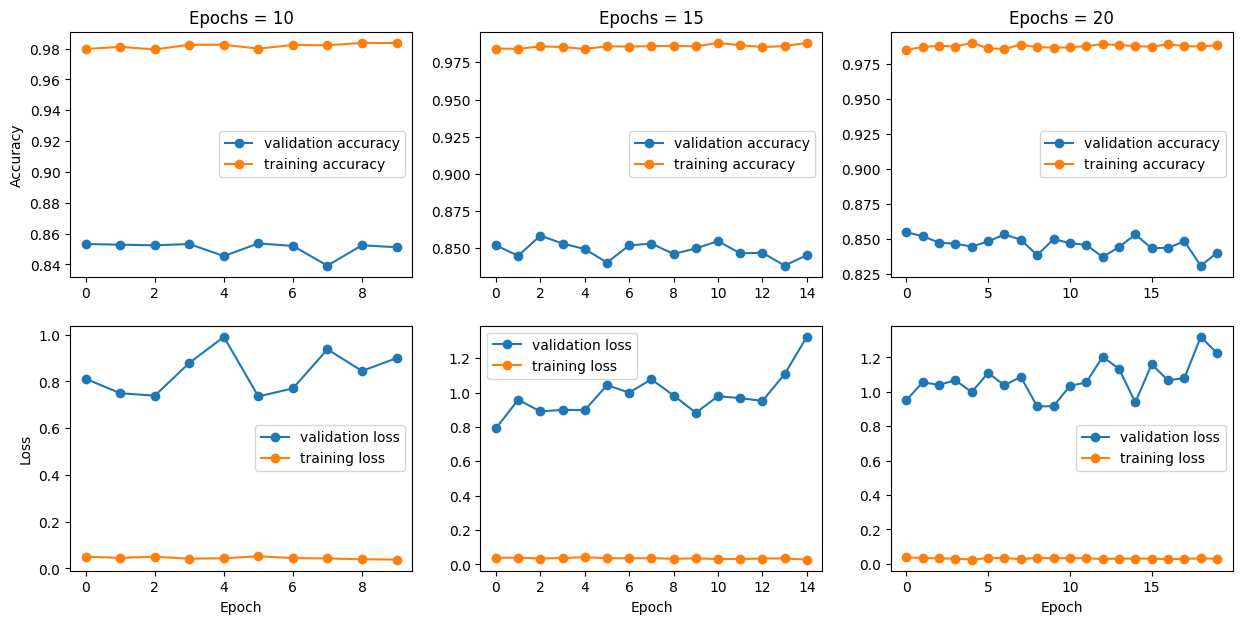

Let's try to improve the quality of recognition, using the method of transfer lerning.

We will use weights of deep neural networks already trained on large dataset such as  ImageNet, and provide fine tuning of several additional dense layers on new data relevant to the current classification task. The more new images will differ from those on which the network has been trained, the more layers will need to be “retrained” in order to get good classification accuracy. The intuition here is that the model has already learned how to highlight the necessary features on the images in the large dataset, it only needs to be “tweaked” for a specific task.

## Task 2(25 points)

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [ ]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:



58889256/58889256 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [ ]:
# add layers to VGG16:

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 8192)              0         
                                                                 
 dense_12 (Dense)            (None, 256)               2097408   
                                                                 
 activation_30 (Activation)  (None, 256)               0         
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 257       
                                                                 
 activation_31 (Activation)  (None, 1)                

In [ ]:
# Implement the code to train the model
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

Epoch 1/5


C:\Users\Eva_D\AppData\Local\Temp\ipykernel_14748\3132948333.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_vgg=model_2.fit_generator(train_generator, steps_per_epoch=nb_train_samples // batch_size, epochs=5, validation_data=val_generator, validation_steps=nb_validation_samples // batch_size)


312/312 [==============================] - 390s 1s/step - loss: 0.4629 - accuracy: 0.7779 - val_loss: 0.3453 - val_accuracy: 0.8643
Epoch 2/5
312/312 [==============================] - 393s 1s/step - loss: 0.3340 - accuracy: 0.8543 - val_loss: 0.2955 - val_accuracy: 0.8832
Epoch 3/5
312/312 [==============================] - 390s 1s/step - loss: 0.2961 - accuracy: 0.8746 - val_loss: 0.2714 - val_accuracy: 0.8919
Epoch 4/5
312/312 [==============================] - 390s 1s/step - loss: 0.2710 - accuracy: 0.8849 - val_loss: 0.2583 - val_accuracy: 0.8968
Epoch 5/5
312/312 [==============================] - 391s 1s/step - loss: 0.2555 - accuracy: 0.8913 - val_loss: 0.2496 - val_accuracy: 0.9009


C:\Users\Eva_D\AppData\Local\Temp\ipykernel_14748\3690367326.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  scores = model_2.evaluate_generator(test_generator, nb_test_samples // batch_size)


Accuracy on test data: 88.90%


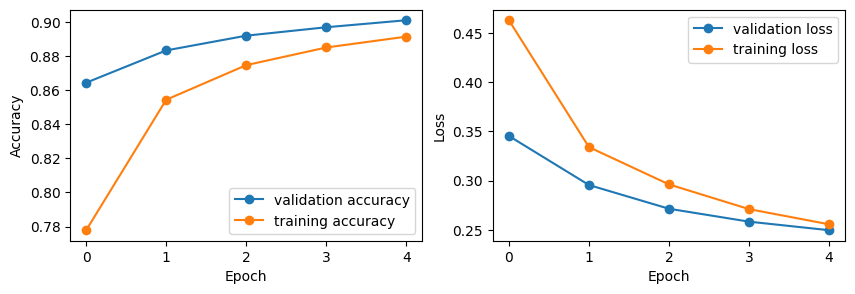

# Save and Showcase how good is your model

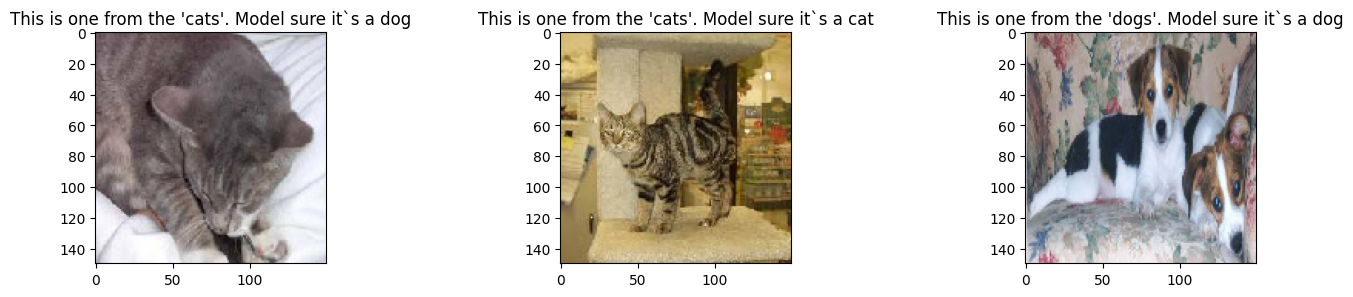

In this task, we will create and train a ResNet-based model from scratch to improve classification accuracy.

## Task 3(25 points)
Build and Train ResNet-based Model:

Design a ResNet-based neural network architecture, customizing the number of layers, channels, and other hyperparameters based on classification task.

Plot Loss and Accuracy

Evaluate accuracy on validation and test datasets separately.

In [ ]:
import torch
import torch.nn as nn

# Define the basic building blocks of a ResNet: Residual Block and Residual Layer
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        # Shortcut connection to match dimensions
        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out)
        out = self.bn2(out)
        out += self.shortcut(x)
        out = self.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self.make_layer(block, 64, layers[0])
        self.layer2 = self.make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self.make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self.make_layer(block, 512, layers[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def make_layer(self, block, out_channels, blocks, stride=1):
        layers = []
        layers.append(block(self.in_channels, out_channels, stride))
        self.in_channels = out_channels
        for _ in range(1, blocks):
            layers.append(block(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        #TODO: you need to implement the forward function
        return

# Create a ResNet model
resnet = ResNet(ResidualBlock, [2, 2, 2, 2], num_classes=1)

In [ ]:
# Train your ResNet Model

In [ ]:
# Test the accuracy

In [ ]:
# Plot loss and accuracy

In this task, we will create and train a UNet-based model from scratch to improve classification accuracy.

## Task 4(25 points)
Build and Train UNet-based Model for binary classification task:

Design a UNet-based neural network architecture, customizing the encoder,bottleneck, and the decoder structure.

Plot Loss and Accuracy

Evaluate accuracy on test datasets.

In [ ]:
import torch
import torch.nn as nn

# Define the basic building blocks: Encoder Block,Bottleneck Block, Decoder Block

class EncoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels):

    def forward(self, x):
        
class BottleneckBlock(nn.Module):
    def __init__(self, in_channels, out_channels):

    def forward(self, x):        
        
class DecoderBlock(nn.Module):
    def __init__(self, in_channels, out_channels):

    def forward(self, x, bridge):

class UNet(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UNet, self).__init__()
        # Encoder
        self.encoder = 

        # Bottleneck
        self.bottleneck = 

        # Decoder
        self.decoder = 

    def forward(self, x):


# Create a U-Net model for binary classification
unet = UNet()

# Define Binary Cross-Entropy loss and an optimizer
criterion = 
optimizer = 


In [ ]:
#Define the model training process

#Plot Loss and Accuracy

#Evaluate accuracy on test datasets.